# Step wedge

## Load some modules

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import threshold_otsu
from skimage.measure import label
from uncertainties import ufloat
import uncertainties as ct
from uncertainties import unumpy as unp

import importlib
import sys

sys.path.append('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil\\notebooks')

import amglib.imageutils as amg
import amglib.readers as rd
import amglib.bb as bb

import os

os.chdir('C:\\Users\\marcu\\OneDrive\\Desktop\\PraktikumIII\\CapillaryRiseInSoil')

In [28]:
dc = rd.readImages('data/02_rawdata/01_Stepwedges/dc_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)
dc.shape

  0%|          | 0/10 [00:00<?, ?it/s]

(1201, 1201)

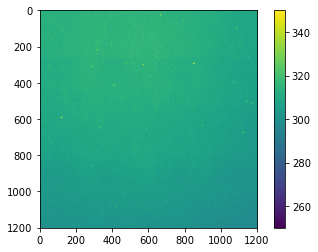

In [29]:
plt.imshow(dc,vmin=250,vmax=350)
plt.colorbar()

##### Average dark current bias

In [30]:
np.mean(dc) # non-zero!

309.07270283115685

### Images with empty step wedges 

In [31]:
es = rd.readImages('data/02_rawdata/01_Stepwedges/container_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
# ob = rd.readImages('data/02_rawdata/01_Stepwedges/dc_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

In [32]:
es.shape

(1201, 1201)

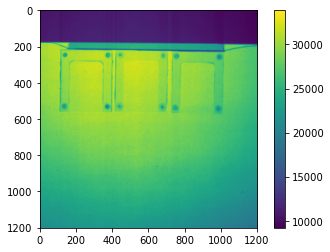

In [33]:
plt.imshow(es)
plt.colorbar()

### Open beam 

In [34]:
ob = rd.readImages('data/02_rawdata/01_Stepwedges/ob_{0:05d}.fits',first=1,last=11).astype(float).mean(axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

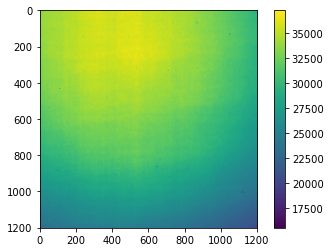

In [35]:
plt.imshow(ob)
plt.colorbar()

In [36]:
water = rd.readImages('data/02_rawdata/01_Stepwedges/water_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

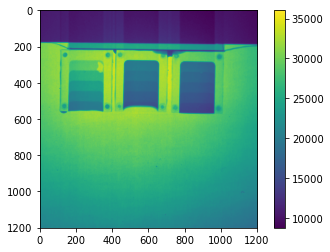

In [37]:
plt.imshow(water)
plt.colorbar()

#### Choose normalization! 

In [38]:
## if you are normalizing with the empty step-wedges, then uncomment the following block of code:
ob = es

### Normalize (Beer Lambert)

$$p=-log(\frac{I-I_{dc}}{I_{ob}-I_{dc}})$$

In [39]:
ob = ob - dc
ob[ob<1]=1
ob= ob[::-1]

water = water - dc
water[water<1]=1
water = water[::-1]

Measure the intensity 'dose' in the open beam and water image. Use this as scaling in the normalization.

In [40]:
d0=ob[10:50,10:50].mean()
d=water[10:50,10:50].mean()

In [41]:
p = -np.log(d0/d*(water)/(ob))

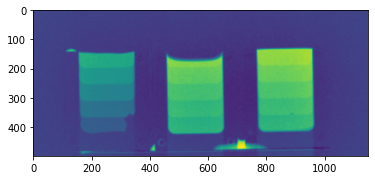

In [42]:
plt.imshow(p[500:1000,0:1150])
# plt.axis('off')
# plt.savefig("processed_data/wedges_removed_es.png", dpi=500)

In [17]:
p=p[500:1000,0:1150]

## Look at the profile plots

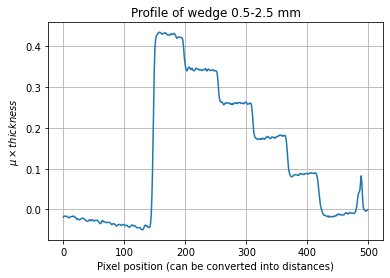

In [18]:
plt.plot(p[:,200:250].mean(axis=1))
plt.title('Profile of wedge 0.5-2.5 mm')
plt.xlabel('Pixel position (can be converted into distances)')
plt.ylabel(r'$\mu\times thickness$')
plt.grid()

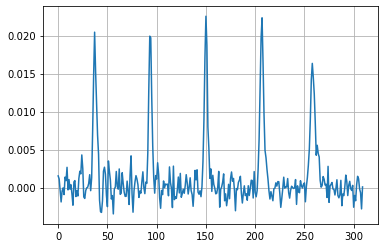

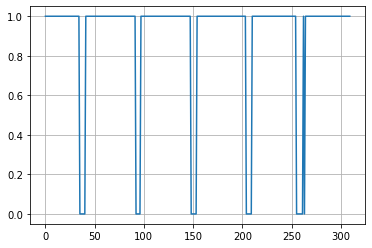

In [19]:
p1=p[:,200:250].mean(axis=1)

dp1 = p1[:-1]-p1[1:]

plt.figure()
plt.plot(dp1[160:470])
plt.grid()

plt.figure()
plt.plot(dp1[160:470]<0.005)
plt.grid()

mask = dp1<0.005

In [20]:
from skimage.measure import label

l=label(mask)
# p1=p[:,200:250].mean(axis=1)
p10=p1[1:]
np.mean(p10[l==0]) 

0.1751836759276611

0.1751836759276611


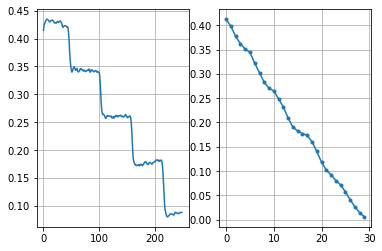

In [21]:
fig, ax = plt.subplots(1,2)
ax = ax.ravel()
ax[0].plot(p10[150:400], '-')
ax[1].plot(p10[l==0][0:30], '.-')
for axis in ax:
    axis.grid()
    
print(np.mean(p10[l==0]))

In [22]:
print(np.mean(p10[l==0]), np.std(p10[l==0], ddof=1), len(p10[l==0]))

0.1751836759276611 0.13056101526535183 35


In [23]:
(np.mean(p10[l==0]) / np.std(p10[l==0], ddof=1))**-1

0.7452807150779541

# Task
To measure the attenuation coefficien from the images. Compare when container images are used as OB images instead of the one without anything.

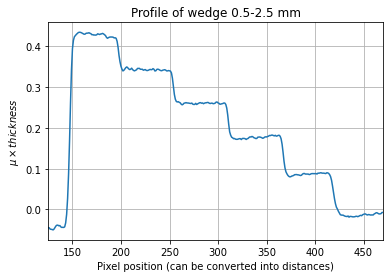

In [24]:
attenuation_coeffs = p[:, 200:250].mean(axis=1)
plt.plot(attenuation_coeffs)
plt.title('Profile of wedge 0.5-2.5 mm')
plt.xlabel('Pixel position (can be converted into distances)')
plt.xlim(125, 470)
plt.ylabel(r'$\mu\times thickness$')
plt.grid()

## Own analysis

###  Looking at all the stepwedges

In [25]:
step_wedge_1 = p[:, 200:250]
stw1_average = step_wedge_1.mean(axis=1)

step_wedge_2 = p[:, 500:550]
stw2_average = step_wedge_2.mean(axis=1)

step_wedge_3 = p[:, 800:850]
stw3_average = step_wedge_3.mean(axis=1)

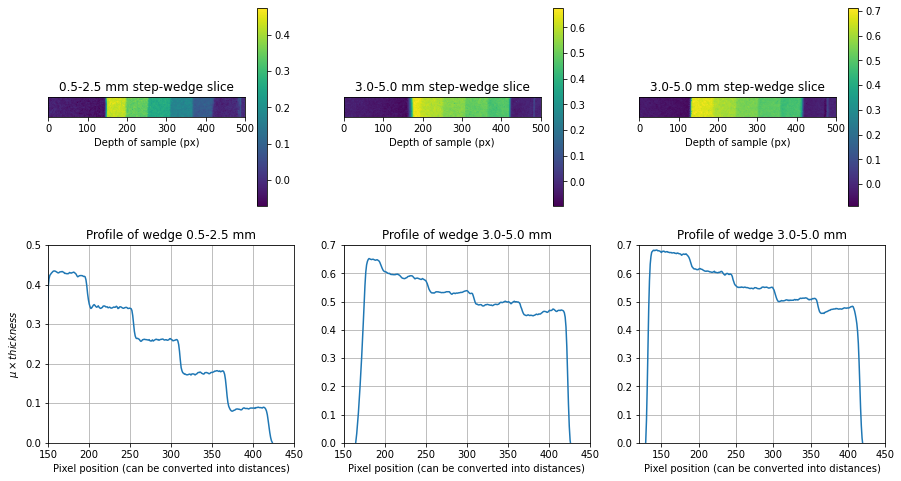

In [70]:
fig, ax = plt.subplots(2, 3)
# fig.set_size_inches(18, 10)
fig.set_size_inches(15, 8)
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].imshow(np.transpose(step_wedge_1))
ax[0].tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False
) # labels along the bottom edge are off
ax[0].set_title("0.5-2.5 mm step-wedge slice")
ax[0].set_xlabel("Depth of sample (px)")

ax[1].imshow(np.transpose(step_wedge_2), interpolation = 'none')
ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
ax[1].set_title("3.0-5.0 mm step-wedge slice")
ax[1].set_xlabel("Depth of sample (px)")

ax[2].imshow(np.transpose(step_wedge_3), interpolation = 'none')
ax[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
ax[2].set_title("3.0-5.0 mm step-wedge slice")
ax[2].set_xlabel("Depth of sample (px)")

ax[3].plot(step_wedge_1.mean(axis=1))
ax[3].set_title('Profile of wedge 0.5-2.5 mm')
ax[3].set_xlabel('Pixel position (can be converted into distances)')
ax[3].set_xlim(150, 450)
ax[3].set_ylim(0, 0.5)
ax[3].set_ylabel(r'$\mu\times thickness$')
ax[3].grid()

ax[4].plot(step_wedge_2.mean(axis=1))
ax[4].set_title('Profile of wedge 3.0-5.0 mm')
ax[4].set_xlabel('Pixel position (can be converted into distances)')
ax[4].set_xlim(150, 450)
ax[4].set_ylim(0, 0.7)
ax[4].grid()

ax[5].plot(step_wedge_3.mean(axis=1))
ax[5].set_title('Profile of wedge 3.0-5.0 mm')
ax[5].set_xlabel('Pixel position (can be converted into distances)')
ax[5].set_xlim(120, 450)
ax[5].set_ylim(0,0.7)
ax[5].grid()


for (axis, wedge) in zip(ax, [step_wedge_1, step_wedge_2, step_wedge_3]):
    pcm = axis.pcolormesh(np.transpose(wedge))
    fig.colorbar(pcm, ax=axis, shrink=1)
    
fig.savefig("processed_data/step_wedges_no_bb_ob_calib.png")

## Plotting distances between adjacent points

###### Differences in the relevant regions

In [27]:
d1 = (stw1_average[:-1] - stw1_average[1:])
d2 = (stw2_average[:-1] - stw2_average[1:])
d3 = (stw3_average[:-1] - stw3_average[1:])

#####  Plottting

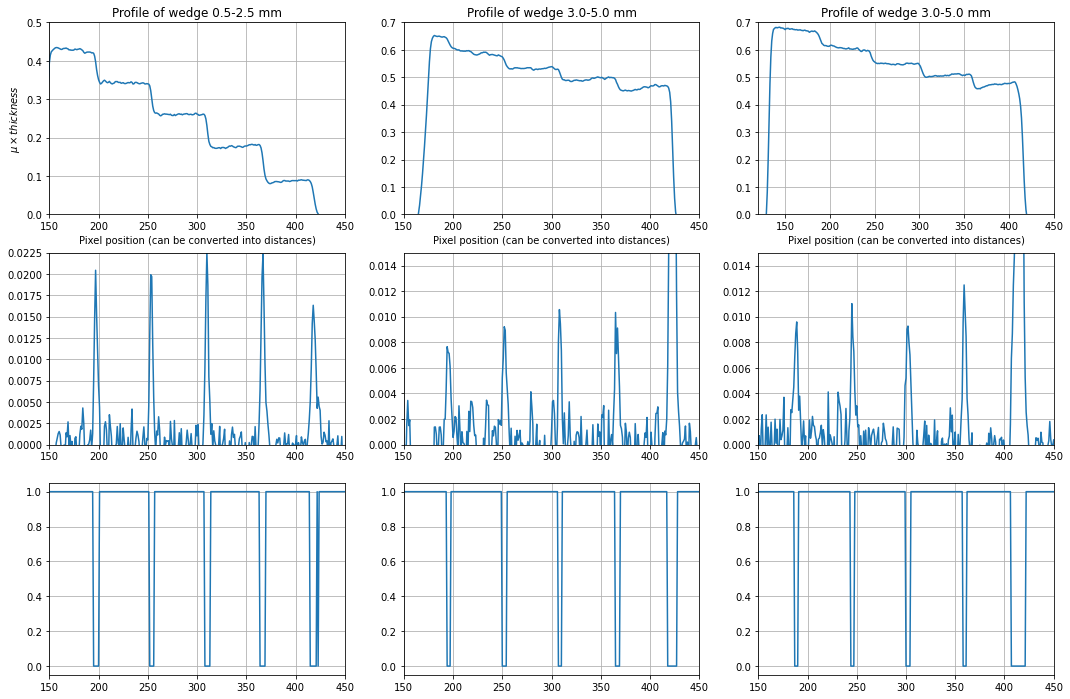

In [28]:
fig, ax = plt.subplots(3, 3)
# fig.set_size_inches(18, 10)
fig.set_size_inches(18, 12)
# fig.set_dpi(800)
ax = ax.ravel()

ax[0].plot(step_wedge_1.mean(axis=1))
ax[0].set_title('Profile of wedge 0.5-2.5 mm')
ax[0].set_xlabel('Pixel position (can be converted into distances)')
ax[0].set_xlim(150, 450)
ax[0].set_ylim(0, 0.5)
ax[0].set_ylabel(r'$\mu\times thickness$')
ax[0].grid()

ax[1].plot(step_wedge_2.mean(axis=1))
ax[1].set_title('Profile of wedge 3.0-5.0 mm')
ax[1].set_xlabel('Pixel position (can be converted into distances)')
ax[1].set_xlim(150, 450)
ax[1].set_ylim(0, 0.7)
ax[1].grid()

ax[2].plot(step_wedge_3.mean(axis=1))
ax[2].set_title('Profile of wedge 3.0-5.0 mm')
ax[2].set_xlabel('Pixel position (can be converted into distances)')
ax[2].set_xlim(120, 450)
ax[2].set_ylim(0, 0.7)
ax[2].grid()

ax[3].plot(d1)
ax[3].set_xlim(150, 450)
ax[3].set_ylim(0, 0.0225)
ax[3].grid()

ax[4].plot(d2)
ax[4].set_xlim(150, 450)
ax[4].set_ylim(0, 0.015)
ax[4].grid()

ax[5].plot(d3)
ax[5].set_xlim(150, 450)
ax[5].set_ylim(0, 0.015)
ax[5].grid()

mask1 = d1<0.0050
mask2 = d2<0.0045
mask3 = d3<0.0050

ax[6].plot(abs(d1)<mask1)
ax[6].set_xlim(150, 450)
ax[6].grid()


ax[7].plot(abs(d2)<mask2)
ax[7].set_xlim(150, 450)
ax[7].grid()

ax[8].plot(abs(d3)<mask3)
ax[8].set_xlim(150, 450)
ax[8].grid()


In [29]:
l1 = label(mask1)
l2 = label(mask2)
l3 = label(mask3)

In [30]:
s_stw1 = step_wedge_1.mean(axis=1)[1:]
masked_1 = s_stw1[l1 == 0]

s_stw2 = step_wedge_2.mean(axis=1)[1:]
masked_2 = s_stw2[l2 == 0]

s_stw3 = step_wedge_3.mean(axis=1)[1:]
masked_3 = s_stw3[l3 == 0]

####  Plotting with masks & adding fits

##### Adding regressions  -> ignore these and use the means?

In [33]:
from scipy.optimize import curve_fit

In [34]:
def linear(x, a, b):
    return a*x+b

fitting_params0 = np.zeros((3, 2))
error_array0 = np.zeros((3,2))
for (index, y_values) in enumerate([masked_1, masked_2, masked_3]):
    if index == 0:
        count = 30
    elif index == 1:
        count = 26
    elif index == 2:
        count = 28

    y_values = y_values[0:count]
    y_values = np.flip(y_values)
    
    x_data = range(0, count)
    
    popt, pcov = curve_fit(linear, x_data, y_values, p0=[2.5, 0.1])
    errors = np.sqrt(np.diag(pcov))
    
    fitting_params0[index] = popt
    error_array0[index] = np.sqrt(np.diag(pcov))    

In [35]:
print(fitting_params0)

[[ 0.01403139 -0.00320976]
 [ 0.01907943  0.2119928 ]
 [ 0.0162827   0.24626867]]


In [38]:
array_with_errors_0 = unp.uarray(fitting_params0, error_array0)

###### Initial plots :  

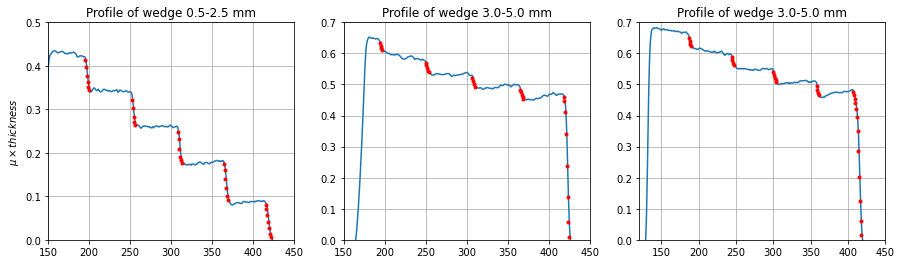

In [39]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 4)
# fig.set_size_inches(14, 4)
# fig.set_dpi(800)
ax = ax.ravel()

model = lambda x, a, b: a * x + b


ax[0].plot(stw1_average)
ax[0].set_title('Profile of wedge 0.5-2.5 mm')
ax[0].set_xlim(150, 450)
ax[0].set_ylim(0, 0.5)
ax[0].set_ylabel(r'$\mu\times thickness$')
ax[0].plot(np.where(l1 == 0)[0], masked_1, 'r.')

ax[1].plot(stw2_average)
ax[1].set_title('Profile of wedge 3.0-5.0 mm')
ax[1].set_xlim(150, 450)
ax[1].set_ylim(0, 0.7)
ax[1].plot(np.where(l2 == 0)[0], masked_2, 'r.')

ax[2].plot(stw3_average)
ax[2].set_title('Profile of wedge 3.0-5.0 mm')
ax[2].set_xlim(120, 450)
ax[2].set_ylim(0, 0.7)
ax[2].plot(np.where(l3 == 0)[0], masked_3, 'r.')

for axis in ax:
    axis.grid()

#### Convert to cm & finding $\mu$ - fitting

In [40]:
px_per_centimeter = 112.719 # px / cm

In [41]:
print("Values from performing fit:")
fitting_params0[:,0] * px_per_centimeter # 1 / px * px / cm 

Values from performing fit:


array([1.58160476, 2.15061457, 1.83536973])

In [42]:
np.mean(fitting_params0[:,0] * px_per_centimeter), np.std(fitting_params0[:,0] * px_per_centimeter, ddof=1)

(1.8558630204673665, 0.28505792765249227)

With errors:

In [43]:
array_with_errors_0[:,0] * px_per_centimeter # 1 / px * px / cm 

array([1.581604759335129+/-0.016614242647513124,
       2.1506145693884724+/-0.23965311317355753,
       1.8353697326784977+/-0.16615961024150552], dtype=object)

#### Alternative version with averaging 

In [44]:
# Anders did this
p10=p1[1:]

np.mean(p10[l==0])

0.1751836759276611

###### Same for our values  -> averaging the gradient 

In [63]:
# fig, ax = plt.subplots(1,3)
# fig.set_size_inches(18,5)
ax = ax.ravel()

att_coeffs = []
for (ind,val) in enumerate([d1[l1==0], d2[l2==0], d3[l3==0]]):
    if index == 0:
        count = 30
    elif index == 1:
        count = 26
    elif index == 2:
        count = 28
        
    val = val[0:count]
    
    tmpv = ufloat(np.mean(val) * px_per_centimeter, np.std(val, ddof=1) * px_per_centimeter)
    att_coeffs.append(tmpv)
    print(f"Suggested attenuation coefficient: {tmpv}")
#     ax[ind].plot(val)
#     ax[ind].grid()

# ax[0].set_ylabel("Average derivative")
# ax[0].set_xlabel("Point")

Suggested attenuation coefficient: 1.5+/-0.6
Suggested attenuation coefficient: 2.5+/-3.3
Suggested attenuation coefficient: 2.3+/-2.6


In [64]:
att_coeffs

[1.498434775084539+/-0.6208617212094703,
 2.529367934100278+/-3.305559215007328,
 2.279230408235885+/-2.6287718722505145]

In [47]:
averaged_values = np.zeros((3,1))
# for (ind,val) in enumerate([masked_1, masked_2, masked_3]):
for (ind,val) in enumerate([d1[l1==0], d2[l2==0], d3[l3==0]]):
    averaged_values[ind] = val.mean()

In [48]:
print("Values from averaging the mask:")
averaged_values * px_per_centimeter # wrong ??? -> way too big

Values from averaging the mask:


array([[1.54149575],
       [2.349968  ],
       [2.1703823 ]])

In [49]:
np.mean(averaged_values * px_per_centimeter), np.std(averaged_values * px_per_centimeter, ddof=1)

(2.0206153503433506, 0.42453438982566943)

## Black body correction
Scattered neutrons introduce a bias in the values. This can be corrected using black body images.

In [50]:
bb_imgs = rd.readImages('data/02_rawdata/01_Stepwedges/bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)
bb_es = rd.readImages('data/02_rawdata/01_Stepwedges/water_bb_{0:05d}.fits',first=1,last=6).astype(float).mean(axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

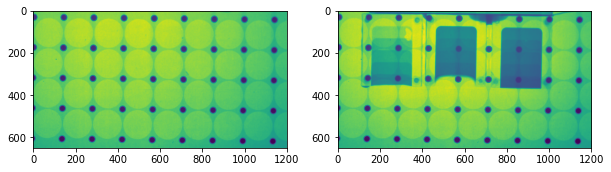

In [51]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 6)

ax = ax.ravel()
ax[0].imshow(bb_imgs[200:850, :])
ax[1].imshow(bb_es[200:850, :])

# for (axis, wedge) in zip(ax, [bb, bb_es]):
#     pcm = axis.pcolormesh(wedge)
#     fig.colorbar(pcm, ax=axis, shrink=0.8)

#### Normalize (Beer-Lambert) + BB 

In [52]:
bb_imgs = bb_imgs[200:850, :]

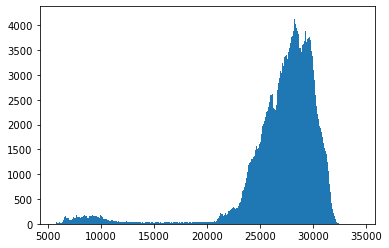

In [53]:
plt.hist(bb_imgs.ravel(), bins=1000);

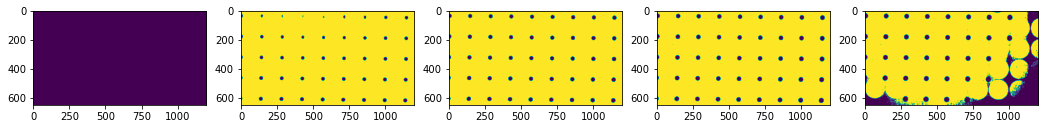

In [54]:
th1 = 5000
th2 = 10000
th3 = 15000
th4 = 20000
th5 = 25000
fig, ax = plt.subplots(1,5)
fig.set_size_inches(18,10)
ax = ax.ravel()

ax[0].imshow(th1<bb_imgs)

ax[1].imshow(th2<bb_imgs)

ax[2].imshow(th3<bb_imgs)

ax[3].imshow(th4<bb_imgs)

ax[4].imshow(th5<bb_imgs)


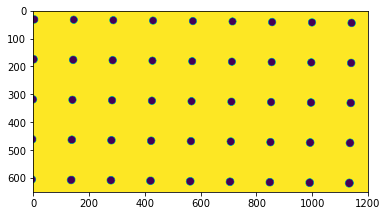

In [55]:
plt.figure()
plt.imshow(th3 < bb_imgs)

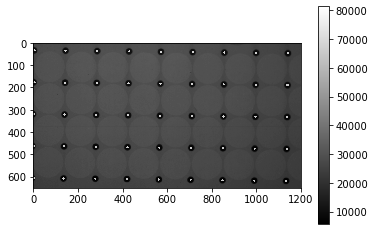

In [56]:
mask,r,c = bb.get_black_bodies(bb_imgs, greythres=15000, areas=[0, 1000] , R=5)

plt.imshow(1000*mask+bb_imgs,interpolation='none',cmap='gray')
plt.colorbar();

# plt.figure()
# plt.imshow(mask)
# print(np.mean(mask))

In [57]:
img=bb.compute_scatter_image(bb_imgs,r,c)

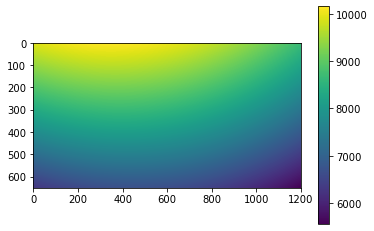

In [58]:
plt.imshow(img)
plt.colorbar()

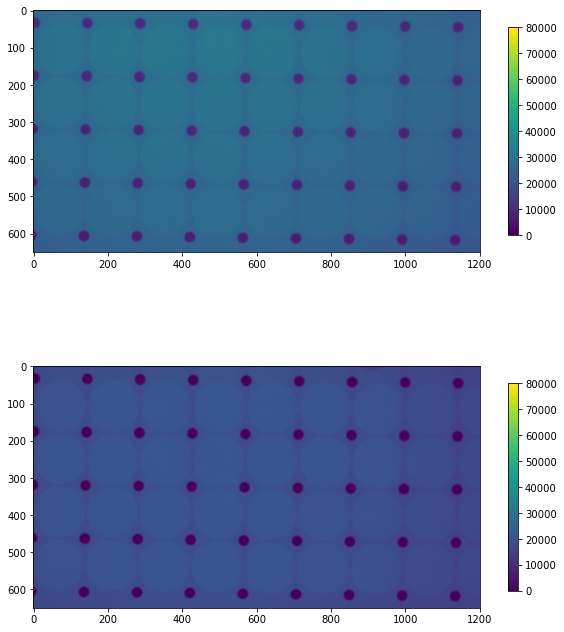

In [59]:
fig,ax = plt.subplots(2,1,figsize=[10,12])
a0=ax[0].imshow(bb_imgs,vmin=0,vmax=80000)

fig.colorbar(a0,ax=ax[0],shrink=0.7);

a1=ax[1].imshow(bb_imgs-img,vmin=0,vmax=80000)

fig.colorbar(a1,ax=ax[1],shrink=0.7);